# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Maurino Audrian Putra
- **Email:** audrianmaurino@gmail.com
- **ID Dicoding:** maurino_audrian

## Menentukan Pertanyaan Bisnis

- Apa saja lima Kategori produk banyak dipesan pelanggan?
- Bagaimana Distribusi review score yang diberikan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset customer
cust_df = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/customers_dataset.csv')
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Load dataset geolocation
geo_df = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Load dataset order_items
order_items = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Load dataset order_payments
order_pay = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# Load dataset order_reviews
order_rev = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# Load dataset orders
orders_df = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# Load dataset product_category_name_translation
product_cat = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# Load dataset products
products_df = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# Load sellers_dataset
sellers_df = pd.read_csv('/content/drive/MyDrive/Project_Analisis_Data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**Periksa semua informasi data**

In [ ]:
print('\n', cust_df.info(), '\n')
print('\n', geo_df.info(), '\n')
print('\n', order_items.info(), '\n')
print('\n', order_pay.info(), '\n')
print('\n', order_rev.info(), '\n')
print('\n', orders_df.info(), '\n')
print('\n', product_cat.info(), '\n')
print('\n', products_df.info(), '\n')
print('\n', sellers_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 n

**Periksa Data yang duplikat**

In [ ]:
print('Jumlah data duplikat customers:', cust_df.duplicated().sum())
print('Jumlah data duplikat geolocation:', geo_df.duplicated().sum())
print('Jumlah data duplikat order items:', order_items.duplicated().sum())
print('Jumlah data duplikat order payments:', order_pay.duplicated().sum())
print('Jumlah data duplikat order reviews:', order_rev.duplicated().sum())
print('Jumlah data duplikat orders:', orders_df.duplicated().sum())
print('Jumlah data duplikat product category:', product_cat.duplicated().sum())
print('Jumlah data duplikat products:', products_df.duplicated().sum())
print('Jumlah data duplikat sellers:', sellers_df.duplicated().sum())

Jumlah data duplikat customers: 0
Jumlah data duplikat geolocation: 261831
Jumlah data duplikat order items: 0
Jumlah data duplikat order payments: 0
Jumlah data duplikat order reviews: 0
Jumlah data duplikat orders: 0
Jumlah data duplikat product category: 0
Jumlah data duplikat products: 0
Jumlah data duplikat sellers: 0


Periksa statistik deskriptif dasar dari tiap dataset

In [48]:
print('\nData describe customers:\n', cust_df.describe(include='all'))
print('\nData describe geolocation:\n', geo_df.describe(include='all'))
print('\nData describe order items:\n', order_items.describe(include='all'))
print('\nData describe order payments:\n', order_pay.describe(include='all'))
print('\nData describe order reviews:\n', order_rev.describe(include='all'))
print('\nData describe orders:\n', orders_df.describe(include='all'))
print('\nData describe product category:\n', product_cat.describe(include='all'))
print('\nData describe products:\n', products_df.describe(include='all'))
print('\nData describe sellers:\n', sellers_df.describe(include='all'))


Data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

### Cleaning Data

Sebelum melakukan EDA, akan  dibuat dataset final yang akan digunakan untuk menjawab pertanyaan bisnis.

1. Gabungkan dataset orders, order_items, products, dan order_reviews berdasarkan kunci yang sesuai.
2. Pertahankan kolom yang relevan untuk analisis.
3. Lakukan preprocessing tambahan jika diperlukan, seperti mengubah format tanggal atau menangani nilai yang hilang.

In [15]:
# Merge datasets
merged_data = pd.merge(orders_df, order_items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products_df, on='product_id', how='inner')
merged_data = pd.merge(merged_data, order_rev, on='order_id', how='inner')

# Select relevant columns
final_dataset = merged_data[['order_id', 'order_purchase_timestamp', 'customer_id',
                             'order_status', 'product_category_name', 'price',
                             'freight_value', 'review_score']]

# Create a copy of the dataframe
final_dataset_copy = final_dataset.copy()

# Convert order_purchase_timestamp to datetime in the copy
final_dataset_copy['order_purchase_timestamp'] = pd.to_datetime(final_dataset_copy['order_purchase_timestamp'])

# Display the first few rows of the final dataset
final_dataset_copy.head()

,order_id,order_purchase_timestamp,customer_id,order_status,product_category_name,price,freight_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,delivered,utilidades_domesticas,29.99,8.72,4
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,a20e8105f23924cd00833fd87daa0831,delivered,utilidades_domesticas,29.99,7.78,4
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,26c7ac168e1433912a51b924fbd34d34,delivered,utilidades_domesticas,29.99,7.78,5
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,53904ddbea91e1e92b2b3f1d09a7af86,delivered,utilidades_domesticas,29.99,14.10,3
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,perfumaria,118.70,22.76,4


In [19]:
# cek tipe data tiap kolom
final_dataset_copy.dtypes

order_id                            object
order_purchase_timestamp    datetime64[ns]
customer_id                         object
order_status                        object
product_category_name               object
price                              float64
freight_value                      float64
review_score                         int64
dtype: object

In [22]:
final_dataset_copy.shape

(112372, 8)

In [27]:
# cek missing value
final_dataset_copy.isna().sum()

order_id                    0
order_purchase_timestamp    0
customer_id                 0
order_status                0
product_category_name       0
price                       0
freight_value               0
review_score                0
dtype: int64

karena missing value pada kolom product_category_name sedikit, yaitu sekitar 1.4& saja, maka missing value akan di drop

In [26]:
# drop missing value
final_dataset_copy.dropna(subset=["product_category_name"], inplace=True)

## Exploratory Data Analysis (EDA)

In [36]:
# 1. Perhitungan jumlah produk untuk setiap kategori
product_category_count = final_dataset_copy['product_category_name'].value_counts()
product_category_count


cama_mesa_banho                  11137
beleza_saude                      9645
esporte_lazer                     8640
moveis_decoracao                  8331
informatica_acessorios            7849
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          13
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [30]:
# 2. Analisis distribusi produk berdasarkan kategori
print("Distribusi Produk Berdasarkan Kategori:")
print(product_category_count)

Distribusi Produk Berdasarkan Kategori:
cama_mesa_banho                  11137
beleza_saude                      9645
esporte_lazer                     8640
moveis_decoracao                  8331
informatica_acessorios            7849
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          13
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64


In [32]:
# 3. Identifikasi kategori produk yang paling banyak dan paling sedikit
most_common_category = product_category_count.idxmax()
least_common_category = product_category_count.idxmin()

print("\nKategori Produk Paling Banyak:", most_common_category)
print("Kategori Produk Paling Sedikit:", least_common_category)


Kategori Produk Paling Banyak: cama_mesa_banho
Kategori Produk Paling Sedikit: seguros_e_servicos


In [42]:
# Filter Dataset untuk Top 5 Kategori Produk:
top_5_categories = product_category_count.head(5)
top_5_categories

cama_mesa_banho           11137
beleza_saude               9645
esporte_lazer              8640
moveis_decoracao           8331
informatica_acessorios     7849
Name: product_category_name, dtype: int64

In [43]:
# Ambil hanya entri yang termasuk dalam top 5 kategori produk
top_5_category_data = final_dataset_copy[final_dataset_copy['product_category_name'].isin(top_5_categories.index)]
top_5_category_data

,order_id,order_purchase_timestamp,customer_id,order_status,product_category_name,price,freight_value,review_score
246,76c6e866289321a7c93b82b54852dc33,2017-01-23 18:29:09,f54a9f0e6b351c431402b8461ea51999,delivered,moveis_decoracao,19.90,16.05,1
247,9abf2c67162c8756e2733a5f36e0ed12,2017-02-10 20:48:26,a2623335c77869716765cebebe4deb18,delivered,moveis_decoracao,19.90,8.97,5
248,9abf2c67162c8756e2733a5f36e0ed12,2017-02-10 20:48:26,a2623335c77869716765cebebe4deb18,delivered,moveis_decoracao,19.90,8.97,5
249,9abf2c67162c8756e2733a5f36e0ed12,2017-02-10 20:48:26,a2623335c77869716765cebebe4deb18,delivered,moveis_decoracao,29.90,14.94,5
371,34513ce0c4fab462a55830c0989c7edb,2017-07-13 19:58:11,7711cf624183d843aafe81855097bc37,delivered,informatica_acessorios,98.00,16.13,4
...,...,...,...,...,...,...,...,...
112366,87b4c933f31145a28413b39d880ad6c3,2018-03-02 17:12:05,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,beleza_saude,57.99,27.26,5
112367,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,esporte_lazer,356.00,18.12,4
112368,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,esporte_lazer,356.00,18.12,4
112370,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,39bd1228ee8140590ac3aca26f2dfe00,delivered,beleza_saude,72.00,13.08,5


In [47]:
# Hitung jumlah ulasan untuk setiap skor ulasan
review_score_counts = final_dataset_copy['review_score'].value_counts()
review_score_counts

5    62682
4    21014
1    13945
3     9322
2     3811
Name: review_score, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja lima Kategori produk banyak dipesan pelanggan?



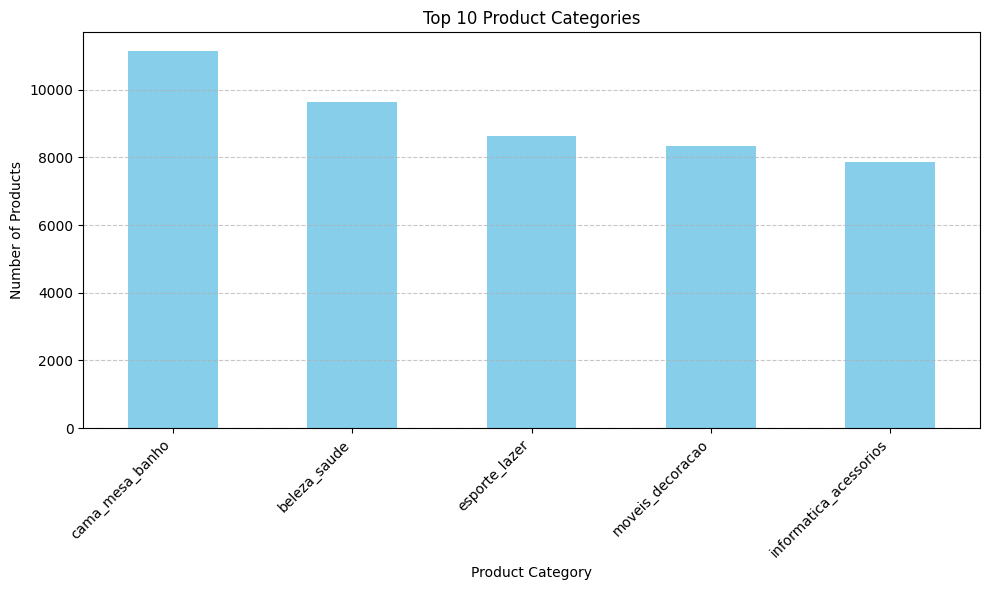

In [37]:
# Visualisasi distribusi produk berdasarkan kategori

# Pilih 5 kategori teratas
top_10_categories = product_category_count.head(5)

# Buat visualisasi distribusi produk berdasarkan kategori
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan hasil analisis yang telah dilakukan, Top 5 Kategori Produk yang banyak dipesan secara berturut-turut adalah cama_mesa_banho, beleza_saude, esporte_lazer, movies_moveis_decoracao, dan informatica_acessorios

### Pertanyaan 2: Bagaimana Distribusi review score yang diberikan pelanggan?

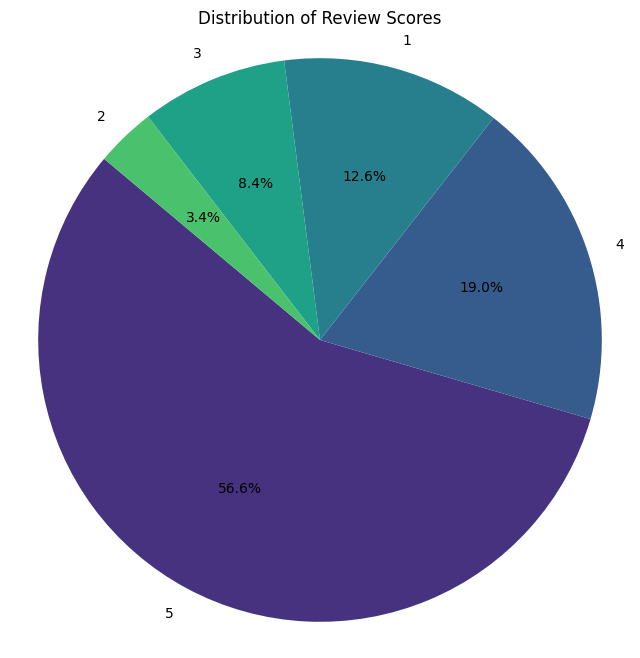

In [45]:
# Buat pie chart untuk distribusi skor ulasan
plt.figure(figsize=(8, 8))
plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Review Scores')
plt.axis('equal')  # Mengatur agar pie chart menjadi lingkaran
plt.show()

Berdasarkan hasil analisis yang telah dilakukan, Sebagian besar pelanggan (56.6%) pelanggan memberikan score review 5, 19% memberi score review 4, 8.4% memberi score review 3, 3.4% pelanggan memberi score review 2, dan 12.6% pelanggan memberikan score review 1.

## Conclusion

Dari informasi yang diberikan, dapat disimpulkan bahwa:

- Conclution pertanyaan 1

Lima kategori produk yang paling banyak dipesan oleh pelanggan adalah cama_mesa_banho, beleza_saude, esporte_lazer, movies_moveis_decoracao, dan informatica_acessorios.

- Conclution pertanyaan 2

Distribusi review score yang diberikan oleh pelanggan menunjukkan bahwa sebagian besar pelanggan (56.6%) memberikan score review 5, diikuti oleh 19% yang memberi score review 4, 8.4% memberi score review 3, 3.4% memberi score review 2, dan 12.6% memberikan score review

In [49]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.21.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.0.3
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0


In [50]:
# Simpan dataset final_dataset_copy dengan format pickle
final_dataset_copy.to_pickle('final_dataset_copy.pickle')

In [51]:
# Simpan dataset final_dataset_copy dengan format pickle
final_dataset_copy.to_pickle('final_dataset_copy.pkl')